<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
        <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Logotipo de Skills Network">
    </a>
</p>

# Agrupamiento K-Means

Tiempo estimado necesario: **25** minutos

## Objetivos

Después de completar este laboratorio, serás capaz de:

* Utilizar el algoritmo de agrupamiento K-Means de scikit-learn para agrupar datos


## Introducción

Existen muchos modelos para el **agrupamiento (clustering)**. En este cuaderno, presentaremos el modelo que se considera uno de los más sencillos entre ellos. A pesar de su simplicidad, **K-means** se utiliza ampliamente para el agrupamiento en muchas aplicaciones de ciencia de datos, y es especialmente útil cuando se necesita descubrir rápidamente información a partir de **datos no etiquetados**. En este cuaderno aprenderás a utilizar K-means para la segmentación de clientes.

Algunas aplicaciones reales de K-means:
- Segmentación de clientes
- Comprender qué intentan hacer los visitantes de un sitio web
- Reconocimiento de patrones
- Aprendizaje automático
- Compresión de datos

En este cuaderno practicamos el agrupamiento K-means con 2 ejemplos:
- K-means sobre un conjunto de datos generado aleatoriamente
- Uso de K-means para la segmentación de clientes


<h1>Tabla de contenidos</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#random_generated_dataset">K-Means sobre un conjunto de datos generado aleatoriamente</a></li>
            <ol>
                <li><a href="#setting_up_K_means">Configuración de K-Means</a></li>
                <li><a href="#creating_visual_plot">Creación de la visualización</a></li>
            </ol>
        <p></p>
        <li><a href="#customer_segmentation_K_means">Segmentación de clientes con K-Means</a></li>
            <ol>
                <li><a href="#pre_processing">Preprocesamiento</a></li>
                <li><a href="#modeling">Modelado</a></li>
                <li><a href="#insights">Conclusiones</a></li>
            </ol>
    </ul>
</div>
<br>
<hr>


### Importar librerías
Primero vamos a importar las librerías necesarias.  
Ejecuta también <b>%matplotlib inline</b>, ya que en esta sección vamos a generar gráficos.



In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

<h1 id="random_generated_dataset">K-Means sobre un conjunto de datos generado aleatoriamente</h1>

¡Vamos a crear nuestro propio conjunto de datos para este laboratorio!


Primero necesitamos establecer una semilla aleatoria. Utiliza la función <b>numpy.random.seed()</b>, donde la semilla se establecerá en <b>0</b>.


In [3]:
np.random.seed(0)

A continuación, vamos a crear <i>clusters aleatorios</i> de puntos utilizando la clase <b>make_blobs</b>.  
La clase <b>make_blobs</b> puede recibir muchos parámetros, pero utilizaremos los siguientes. <br><br>

<b><u>Entrada</u></b>
<ul>
    <li><b>n_samples</b>: Número total de puntos, repartidos equitativamente entre los clusters.</li>
    <ul><li>Valor: 5000</li></ul>
    <li><b>centers</b>: Número de centros a generar o localizaciones fijas de los centros.</li>
    <ul><li>Valor: [[4, 4], [-2, -1], [2, -3], [1, 1]]</li></ul>
    <li><b>cluster_std</b>: Desviación estándar de los clusters.</li>
    <ul><li>Valor: 0.9</li></ul>
</ul>
<br>
<b><u>Salida</u></b>
<ul>
    <li><b>X</b>: Array con forma [n_samples, n_features]. (Matriz de características)</li>
    <ul><li>Las muestras generadas.</li></ul> 
    <li><b>y</b>: Array con forma [n_samples]. (Vector de respuesta)</li>
    <ul><li>Etiquetas enteras que indican a qué cluster pertenece cada muestra.</li></ul>
</ul>

In [4]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

Muestra el diagrama de dispersión de los datos generados aleatoriamente.


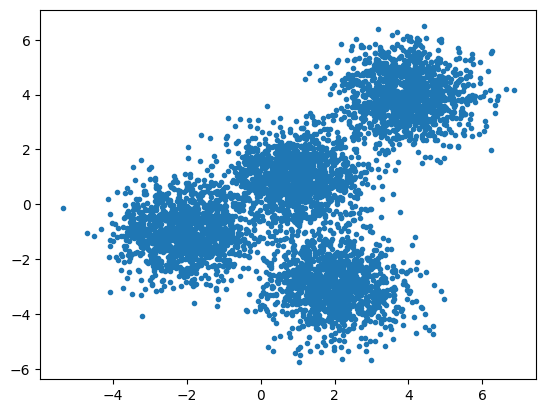

In [5]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

<h2 id="setting_up_K_means">Configuración de K-Means</h2>
Ahora que tenemos nuestros datos aleatorios, vamos a configurar el algoritmo de agrupamiento K-Means.


La clase **KMeans** dispone de numerosos parámetros, pero en este caso utilizaremos los siguientes:

<ul>
    <li><b>init</b>: Método de inicialización de los centroides.</li>
    <ul>
        <li>Valor: <code>"k-means++"</code></li>
        <li>
            <code>k-means++</code>: selecciona los centroides iniciales de forma inteligente para acelerar la convergencia 
            y mejorar la calidad del clustering.  
            <br>
            <i>Es el valor por defecto, por lo que no es necesario especificarlo explícitamente.</i>
        </li>
    </ul>


<li><b>n_clusters</b>: Número de clusters que se van a formar y, por tanto, número de centroides a generar.</li>
<ul>
    <li>Valor: 4 (ya que se desea obtener 4 grupos)</li>
</ul>

<li><b>n_init</b>: Número de veces que se ejecuta el algoritmo KMeans con distintas inicializaciones de los centroides.</li>
<ul>
    <li>
        El resultado final será el mejor en términos de inercia.
        <br>
        <i>Actualmente se recomienda usar <code>"auto"</code>, para que la librería seleccione automáticamente el número óptimo de inicializaciones.</i>
    </li>
    <li>Valor: <code>"auto"</code></li>
</ul>
<li><b>random_state</b>: Controla la aleatoriedad del algoritmo.</li>
<ul>
    <li>
        Permite obtener resultados reproducibles en distintas ejecuciones.
    </li>
    <li>Valor: 42</li>
</ul>

</ul>

Inicializa el algoritmo **KMeans** con estos parámetros y guarda el modelo resultante en una variable llamada <b>k_means</b>.




In [6]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 'auto',random_state=42)

Ahora ajusta (fit) el modelo KMeans utilizando la matriz de características <b>X</b> que hemos creado antes.


In [7]:
k_means.fit(X)

KMeans(n_clusters=4, random_state=42)

Obtén las etiquetas de cada punto del modelo usando el atributo <b>.labels_</b> de KMeans y guárdalas como <b>k_means_labels</b>.


In [8]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 2, 2, ..., 1, 0, 0], dtype=int32)

También obtén las coordenadas de los centros de los clusters utilizando <b>.cluster_centers_</b>  
y guárdalas como <b>k_means_cluster_centers</b>.

In [9]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03556986, -0.99814034],
       [ 3.97334234,  3.98758687],
       [ 1.99876902, -3.01796355],
       [ 0.96900523,  0.98370298]])

<h2 id="creating_visual_plot">Creación de la visualización</h2>

Ahora que ya tenemos los datos generados y el modelo KMeans inicializado, vamos a representarlos gráficamente para ver el resultado.


Lee el código y los comentarios con atención para entender cómo se realiza la visualización.


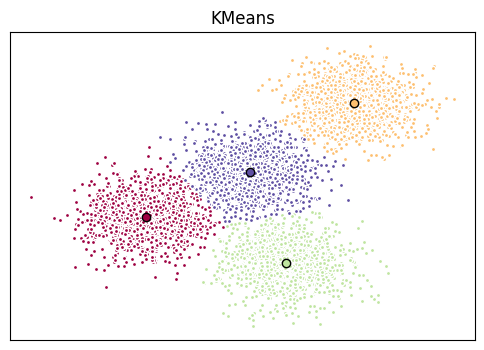

In [10]:
# Inicializa la figura con las dimensiones especificadas.
fig = plt.figure(figsize=(6, 4))

# colors utiliza un mapa de colores, que generará un conjunto de colores
# en función del número de etiquetas existentes. Usamos set(k_means_labels)
# para obtener las etiquetas únicas.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Crear el gráfico
ax = fig.add_subplot(1, 1, 1)

# Bucle for que representa los puntos de datos y los centroides.
# k tomará valores de 0 a 3, que coinciden con los posibles clusters
# a los que puede pertenecer cada punto de datos.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Crear una lista de todos los puntos de datos, donde los puntos que
    # pertenecen al cluster (por ejemplo, el cluster 0) se marcan como True,
    # y el resto como False.
    my_members = (k_means_labels == k)
    
    # Definir el centroide o centro del cluster.
    cluster_center = k_means_cluster_centers[k]
    
    # Representa los puntos de datos con el color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    
    # Representa los centroides con el color especificado,
    # pero con un borde más oscuro.
    ax.plot(cluster_center[0], cluster_center[1], 'o',
            markerfacecolor=col, markeredgecolor='k', markersize=6)

# Título del gráfico
ax.set_title('KMeans')

# Eliminar las marcas del eje X
ax.set_xticks(())

# Eliminar las marcas del eje Y
ax.set_yticks(())

# Mostrar el gráfico
plt.show()



<div style="background-color:green;color:white">

<br>

## Práctica

Intenta agrupar el conjunto de datos anterior en **3 clusters**.
Aviso: no vuelvas a generar los datos, utiliza el mismo conjunto creado anteriormente.

<br>

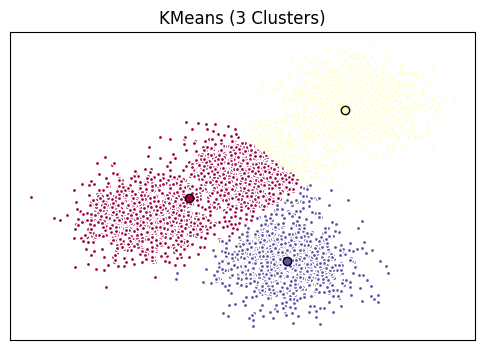

In [11]:
# write your code here
k_means3 = KMeans(init="k-means++", n_clusters=3, n_init=12)
k_means3.fit(X)

k_means_labels3 = k_means3.labels_
k_means_cluster_centers3 = k_means3.cluster_centers_

fig = plt.figure(figsize=(6, 4))

colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels3))))

ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(3), colors):

    my_members = (k_means_labels3 == k)
    
    cluster_center = k_means_cluster_centers3[k]
    
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    
    ax.plot(cluster_center[0], cluster_center[1], 'o',
            markerfacecolor=col, markeredgecolor='k', markersize=6)
    
ax.set_title('KMeans (3 Clusters)')
ax.set_xticks(())
ax.set_yticks(())

plt.show()

<h1 id="customer_segmentation_K_means">Segmentación de clientes con K-Means</h1>

Imagina que dispones de un conjunto de datos de clientes y necesitas aplicar segmentación de clientes sobre datos históricos.
La **segmentación de clientes** es la práctica de dividir una base de clientes en grupos de individuos que comparten características similares. Es una estrategia clave, ya que permite a las empresas dirigirse a grupos específicos y asignar de forma eficiente sus recursos de marketing.

Por ejemplo, un grupo puede incluir clientes con alta rentabilidad y bajo riesgo, es decir, más propensos a comprar productos o suscribirse a servicios. El objetivo del negocio será retener a esos clientes. Otro grupo puede estar formado por clientes de organizaciones sin ánimo de lucro, entre otros.

### Cargar datos desde un archivo CSV

Antes de trabajar con los datos, utilizamos pandas para leer el conjunto de datos desde IBM Object Storage.

In [12]:
import pandas as pd
cust_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


<h2 id="pre_processing">Pre-processing</h2


Como puedes observar, la variable **Address** es una variable categórica. El algoritmo k-means no se puede aplicar directamente a variables categóricas, ya que la distancia euclídea no tiene sentido para valores discretos.
Por ello, eliminamos esta característica y ejecutamos el agrupamiento.

In [13]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


#### Normalización mediante la desviación estándar

Ahora vamos a normalizar el conjunto de datos. ¿Por qué es necesaria la normalización?
La normalización es un método estadístico que ayuda a los algoritmos basados en cálculos matemáticos a interpretar correctamente características con diferentes magnitudes y distribuciones. Para ello utilizamos **StandardScaler()**.

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Selecciona todas las filas del DataFrame y las columnas desde la segunda en adelante
# (se asume que la primera columna no se utiliza para el clustering)
X = df.iloc[:, 1:]

# Se crea un pipeline de preprocesamiento
pipeline = Pipeline([
    # Paso 1: Imputación de valores faltantes (NaN)
    # Sustituye los valores NaN de cada columna por la media de dicha columna
    ("imputer", SimpleImputer(strategy="mean")),

    # Paso 2: Estandarización de las variables
    # Ajusta los datos para que tengan media 0 y desviación estándar 1
    # Esto es fundamental para algoritmos basados en distancia como KMeans
    ("scaler", StandardScaler())
])

# Ajusta el pipeline a los datos y aplica las transformaciones
# El resultado es un array con los datos ya imputados y normalizados
X = pipeline.fit_transform(X)


<h2 id="modeling">Modelado</h2>


En nuestro ejemplo (si no dispusiéramos del algoritmo k-means), este proceso equivaldría a realizar múltiples pruebas y suposiciones sobre la edad, ingresos, educación, etc., de cada grupo de clientes.
Sin embargo, utilizando el agrupamiento K-Means, todo este proceso se realiza de forma mucho más sencilla.

Apliquemos k-means a nuestro conjunto de datos y observemos las etiquetas de los clusters.

In [15]:
# Número de clusters que se desean formar
clusterNum = 3

# Se crea el modelo KMeans
# - init="k-means++": inicializa los centroides de forma eficiente
# - n_clusters=clusterNum: número de grupos a formar
# - n_init=12: número de inicializaciones del algoritmo para elegir la mejor solución
k_means = KMeans(n_clusters=3, n_init="auto", random_state=42)

# Se ajusta el modelo a los datos X
k_means.fit(X)

# Se obtienen las etiquetas de cluster asignadas a cada observación
labels = k_means.labels_

# Se imprimen las etiquetas de los clusters
print(labels)


[0 2 1 0 2 2 0 0 0 2 1 0 0 0 1 0 0 0 2 0 0 0 1 2 2 0 0 0 0 0 0 2 1 0 0 0 1
 1 0 2 1 2 0 2 0 2 0 0 0 0 2 2 1 0 1 1 1 0 0 0 2 0 2 2 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 2 0 0 1 2 0 2 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 2 0 1 1 2 0 0 0 0 0
 1 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 2 0 0 1
 0 0 0 2 1 0 0 0 0 2 1 1 0 2 0 0 0 0 0 0 0 0 2 0 0 1 0 1 0 0 1 2 1 0 0 2 1
 2 0 0 0 0 0 2 0 1 0 0 0 2 2 0 2 0 1 0 0 1 0 2 0 1 0 0 0 0 0 1 1 2 0 0 1 2
 0 0 0 0 2 0 0 1 0 0 0 0 2 0 0 1 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 1 0 1 0
 0 0 2 0 1 2 1 0 2 0 0 1 0 0 0 0 1 1 1 0 0 0 2 0 0 2 0 2 0 0 2 0 0 0 1 0 0
 1 0 1 2 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 2 0 1 0 0 0 1 1 0 0 0 2 1
 0 0 1 0 2 0 0 0 0 0 1 2 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 2 1 0 1 0 0 0 2 2 0
 1 0 2 1 1 0 1 0 1 0 0 0 0 0 2 0 2 0 0 0 0 1 0 1 0 0 0 2 0 0 0 0 1 0 0 1 1
 2 0 0 0 0 0 1 1 0 2 1 2 0 0 1 0 0 2 2 0 1 0 0 2 0 1 0 2 0 0 0 2 0 0 0 0 2
 0 1 0 0 0 0 2 1 0 0 2 0 1 0 0 2 0 2 0 0 0 0 0 0 0 2 2 0 0 2 0 1 0 0 0 1 0
 1 0 0 0 0 0 2 1 1 0 2 0 

<h2 id="insights">Hallazgos</h2>

Asignamos las etiquetas a cada fila del dataframe.


In [16]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


Podemos comprobar fácilmente los valores de los centroides calculando la media de las características de cada cluster.


In [17]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,424.782609,33.958412,1.580340,7.735350,36.228733,0.838707,1.790089,0.000000,7.824386
1,427.034483,31.517241,1.913793,3.850575,31.695402,1.590437,2.841557,0.987879,14.097126
2,426.265306,43.040816,1.938776,17.136054,102.000000,4.216905,7.997068,0.170940,13.972109


Ahora observamos la distribución de los clientes en función de su edad e ingresos.


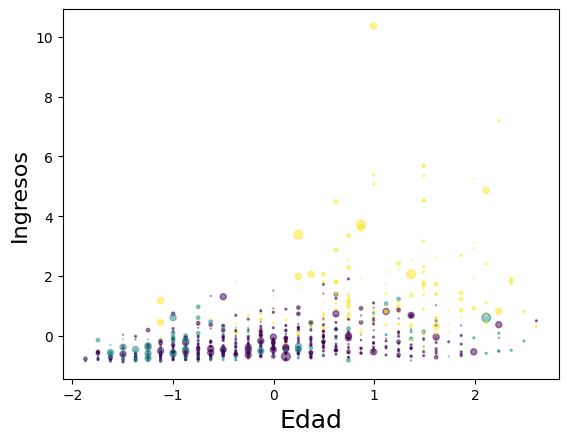

In [18]:
# Calcula el área de cada punto del scatter plot
# Se usa pi * radio², donde el radio es la columna 1 de X
# El área determina el tamaño visual de cada punto
area = np.pi * (X[:, 1])**2  

# Crea un diagrama de dispersión (scatter plot)
plt.scatter(
    X[:, 0],              # Eje X: valores de la columna 0 (Edad)
    X[:, 3],              # Eje Y: valores de la columna 3 (Ingresos)
    s=area,               # Tamaño de cada punto proporcional al área calculada
    c=labels.astype(float),  # Color de los puntos según el cluster asignado
    alpha=0.5             # Transparencia de los puntos (mejora la visualización)
)

# Etiqueta del eje X
plt.xlabel('Edad', fontsize=18)

# Etiqueta del eje Y
plt.ylabel('Ingresos', fontsize=16)

# Muestra la gráfica en pantalla
plt.show()


In [19]:
import pandas as pd
import plotly.express as px

# Convertimos X (array) en DataFrame con nombres de columnas
df_plot = pd.DataFrame(
    X[:, [1, 0, 3]],               # mismas columnas que usabas en matplotlib
    columns=["Education", "Age", "Income"]
)

# Añadimos las etiquetas de cluster
df_plot["cluster"] = labels.astype(str)

# Gráfico 3D interactivo
fig = px.scatter_3d(
    df_plot,
    x="Education",
    y="Age",
    z="Income",
    color="cluster",
    opacity=0.8,
    title="Clusters en 3D (KMeans – interactivo)"
)

fig.show()


ModuleNotFoundError: No module named 'plotly'

K-means divide a los clientes en grupos mutuamente excluyentes, por ejemplo, en 3 clusters.
Los clientes de cada cluster son demográficamente similares entre sí.

A partir de aquí, podemos crear un perfil para cada grupo considerando las características comunes de cada cluster.
Por ejemplo, los 3 clusters podrían ser:

* CLIENTES CON ALTO PODER ADQUISITIVO, ALTO NIVEL EDUCATIVO Y EDAD AVANZADA
* CLIENTES DE EDAD MEDIA E INGRESOS MEDIOS
* CLIENTES JÓVENES CON BAJOS INGRESOS

¿Qué perfil crees que corresponde cada cluster?

### ¡Gracias por completar este laboratorio! 🎉

## Autor

Saeed Aghabozorgi

### Otros Contribuidores

<a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>

### Revisión y traducción

<a href="https://www.linkedin.com/in/carlostessier/" target="_blank">Carlos Tessier</a>

 

## <h3 align="center"> © Corporación IBM 2025. Todos los derechos reservados. <h3/>